# References
- https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
- https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
- https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("students.csv")

In [3]:
df

,lastname,firstname,boss,division
0,Anthony,Michelle (Contractor) L,Calli (Contractor) Jenkerson,Science Division
1,Ballu,Anudeep (Contractor),Calli (Contractor) Jenkerson,Science Division
2,Benedict,Trenton D,Calli (Contractor) Jenkerson,Science Division
3,Boyte,Stephen,Kristi Sayler,Integrated Science & Applications Branch
4,Bunde,Brett (Contractor),Danny (Contractor) Howard,Science Division
5,Butzer,Tony (Contractor),Cory (Contractor) Van Batavia,Satellite Ground System Division
6,Dahal,Devendra (Contractor),Danny (Contractor) Howard,Science Division
7,Danielson,Patrick (Contractor),Danny (Contractor) Howard,Science Division
8,Holen,Cheryl (Contractor) L,Calli (Contractor) Jenkerson,Science Division
9,Mainali,Pukar (Contractor),Calli (Contractor) Jenkerson,Science Division


# Groupby division

In [4]:
students=df
for index,row in students.iterrows():
    #print(row.division)
    div = row.division.strip()
    #print(div)
    students.loc[index,'division'] = div

In [5]:
by_division = students.groupby('division').count()

In [6]:
by_division

,lastname,firstname,boss
division,,,
Integrated Science & Applications Branch,4,4,4
Satellite Ground System Division,2,2,2
Science Division,17,17,17


In [7]:
type(by_division)

pandas.core.frame.DataFrame

In [8]:
howard = students[students['boss'].str.contains('Howard')]

# Who works for Danny Howard - I knew a Steve Howard

In [9]:
howard

,lastname,firstname,boss,division
4,Bunde,Brett (Contractor),Danny (Contractor) Howard,Science Division
6,Dahal,Devendra (Contractor),Danny (Contractor) Howard,Science Division
7,Danielson,Patrick (Contractor),Danny (Contractor) Howard,Science Division
12,Pastick,Neal (Contractor) J,Danny (Contractor) Howard,Science Division


In [10]:
science_folks = students[students['division'].str.contains('Science')]

In [11]:
science_folks

,lastname,firstname,boss,division
0,Anthony,Michelle (Contractor) L,Calli (Contractor) Jenkerson,Science Division
1,Ballu,Anudeep (Contractor),Calli (Contractor) Jenkerson,Science Division
2,Benedict,Trenton D,Calli (Contractor) Jenkerson,Science Division
3,Boyte,Stephen,Kristi Sayler,Integrated Science & Applications Branch
4,Bunde,Brett (Contractor),Danny (Contractor) Howard,Science Division
6,Dahal,Devendra (Contractor),Danny (Contractor) Howard,Science Division
7,Danielson,Patrick (Contractor),Danny (Contractor) Howard,Science Division
8,Holen,Cheryl (Contractor) L,Calli (Contractor) Jenkerson,Science Division
9,Mainali,Pukar (Contractor),Calli (Contractor) Jenkerson,Science Division
10,Mcelhone,Maxwell T,Calli (Contractor) Jenkerson,Science Division


In [12]:
len(science_folks)

21

In [13]:
by_division

,lastname,firstname,boss
division,,,
Integrated Science & Applications Branch,4,4,4
Satellite Ground System Division,2,2,2
Science Division,17,17,17


# Plot the classes of students using boss

In [14]:
boss_by_division = by_division['boss']

In [15]:
boss_by_division

division
Integrated Science & Applications Branch     4
Satellite Ground System Division             2
Science Division                            17
Name: boss, dtype: int64

<AxesSubplot:ylabel='boss'>

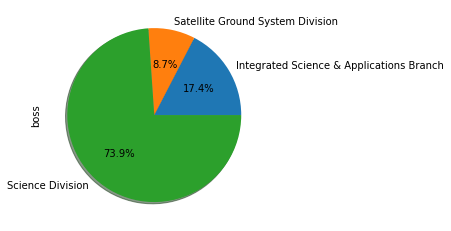

In [16]:
boss_by_division.plot.pie(autopct='%1.1f%%', shadow = True)

<AxesSubplot:xlabel='division'>

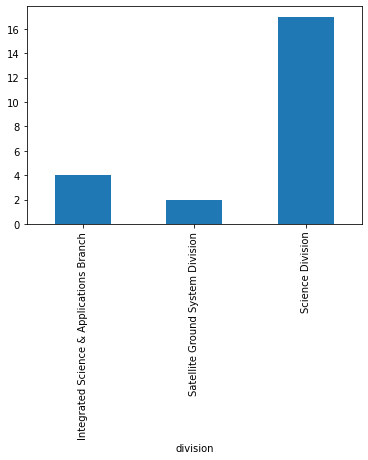

In [17]:
boss_by_division.plot.bar()

# Improve the colors

In [18]:
from itertools import islice
from itertools import cycle
my_colors =  list(islice(cycle(['b', 'r', 'g', 'y', 'k']),None,len(boss_by_division)))

<AxesSubplot:title={'center':'boss by division'}, xlabel='division'>

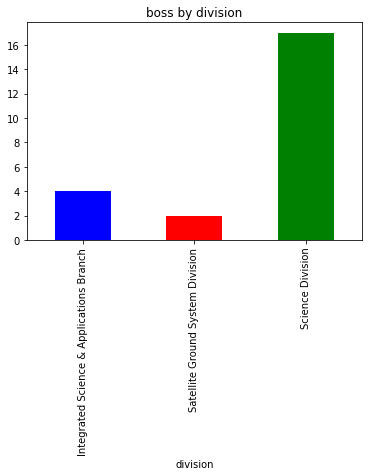

In [19]:
boss_by_division.plot(title='boss by division', kind='bar', stacked=True, color=my_colors)

In [20]:
sayler = students[students['boss'].str.contains('Sayler')]

In [21]:
sayler

,lastname,firstname,boss,division
3,Boyte,Stephen,Kristi Sayler,Integrated Science & Applications Branch
14,Rigge,Matthew B,Kristi Sayler,Integrated Science & Applications Branch
20,Wylie,Bruce K,Kristi Sayler,Integrated Science & Applications Branch


In [22]:
print(students['lastname'])

0       Anthony
1         Ballu
2      Benedict
3         Boyte
4         Bunde
5        Butzer
6         Dahal
7     Danielson
8         Holen
9       Mainali
10     Mcelhone
11       Oimoen
12      Pastick
13       Postma
14        Rigge
15        Rover
16       Schoen
17     Shrestha
18        Smith
19          Sun
20        Wylie
21        Young
22         Zhou
Name: lastname, dtype: object


In [23]:
lastname = students['lastname']
lastname

0       Anthony
1         Ballu
2      Benedict
3         Boyte
4         Bunde
5        Butzer
6         Dahal
7     Danielson
8         Holen
9       Mainali
10     Mcelhone
11       Oimoen
12      Pastick
13       Postma
14        Rigge
15        Rover
16       Schoen
17     Shrestha
18        Smith
19          Sun
20        Wylie
21        Young
22         Zhou
Name: lastname, dtype: object

In [24]:
lastname_no_indices = lastname.to_string(index=False)

In [25]:
print(lastname_no_indices)

   Anthony
     Ballu
  Benedict
     Boyte
     Bunde
    Butzer
     Dahal
 Danielson
     Holen
   Mainali
  Mcelhone
    Oimoen
   Pastick
    Postma
     Rigge
     Rover
    Schoen
  Shrestha
     Smith
       Sun
     Wylie
     Young
      Zhou


In [26]:
type(lastname_no_indices)

str

In [27]:
for i in lastname_no_indices.split('\n'):
    #print(i)
    i = i.lower()
    i = i.strip()
    print(i)

anthony
ballu
benedict
boyte
bunde
butzer
dahal
danielson
holen
mainali
mcelhone
oimoen
pastick
postma
rigge
rover
schoen
shrestha
smith
sun
wylie
young
zhou


# the above list was used to add the students to the tljh - mini-pangeo